In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import result

In [2]:
data_tr = pd.read_csv('./data/boston_transform.csv', 
                      index_col = 'original_idx')
data_missing = pd.read_csv('./data/nan/boston_nan_1.csv',
                           index_col = 'original_idx')

In [3]:
em_imp = pd.read_csv('./data/imp/em/em_imp1.csv', index_col=0)
em_imp.head()

,RM,LSTAT,RAD,CRIM,PTRATIO,DIS,ZN,NOX,CHAS,B,TAX,INDUS,AGE,MEDV
14,5.247699,3.332585,4,-0.699777,0.628668,4.4619,0.0,0.538,0,380.02,307,8.14,84.5,18.2
32,5.897565,3.934556,9,0.201771,0.051314,3.9900,0.0,0.538,0,232.60,307,8.14,82.0,13.2
38,5.882951,2.928779,2,0.088112,0.726870,3.8473,0.0,0.499,0,393.43,279,5.96,30.2,24.7
43,6.088656,2.615941,2,-1.024632,0.163640,5.7209,0.0,0.448,0,394.46,233,6.91,6.5,24.7
44,5.631025,2.687582,12,-0.215754,0.204516,5.7209,0.0,0.448,0,389.39,233,6.91,40.0,21.2


In [4]:
em_mean = dict()
em_std = dict()
ce_mean = dict()
ce_std = dict()

for i in range(1, 1+100):
    em_imp = pd.read_csv('./data/imp/em/em_imp%d.csv'%i, index_col=0)
    ce_imp = pd.read_csv('./data/imp/ce/ce_imp%d.csv'%i, index_col=0)
    
    em_mean[i] = em_imp[['RM', 'LSTAT', 'RAD', 'CRIM', 'PTRATIO']].mean()
    em_std[i] = em_imp[['RM', 'LSTAT', 'RAD', 'CRIM', 'PTRATIO']].std()
    
    ce_mean[i] = ce_imp[['X1.RM', 'X1.LSTAT', 'X1.RAD', 'X1.CRIM', 'X1.PTRATIO']].mean()
    ce_std[i] = ce_imp[['X1.RM', 'X1.LSTAT', 'X1.RAD', 'X1.CRIM', 'X1.PTRATIO']].std()

em_mean = pd.DataFrame(em_mean)

em_std = pd.DataFrame(em_std)
ce_mean = pd.DataFrame(ce_mean)
ce_std = pd.DataFrame(ce_std)

In [5]:
em_mean.to_csv('./data/res/mean_em.csv')
em_std.to_csv('./data/res/std_em.csv')
ce_mean.to_csv('./data/res/mean_ce.csv')
ce_std.to_csv('./data/res/std_ce.csv')

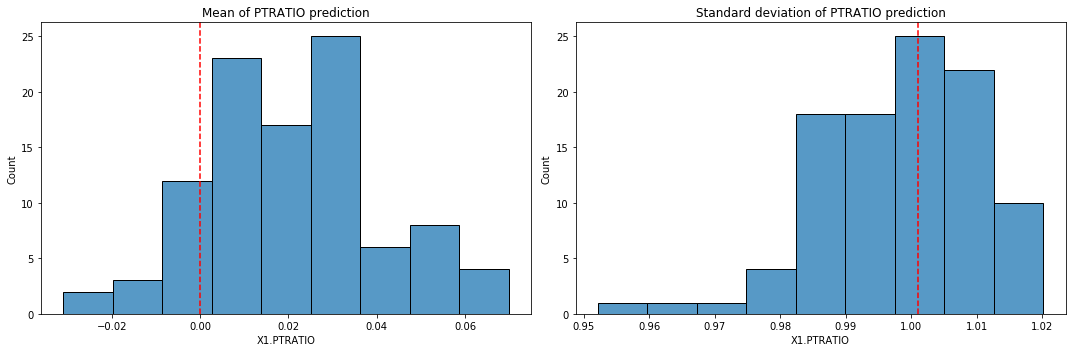

In [6]:
plt.figure(figsize = (15,5))

m = 'PTRATIO'
n = 'X1.'+m

plt.subplot(1,2,1)
sns.histplot(ce_mean.loc[n])
plt.axvline(data_tr.mean()[m], linestyle = '--', color = 'r')
plt.title("Mean of %s prediction" %m)
plt.subplot(1,2,2)
sns.histplot(ce_std.loc[n])
plt.axvline(data_tr.std()[m], linestyle = '--', color = 'r')
plt.title("Standard deviation of %s prediction" %m)
plt.tight_layout()
plt.show()

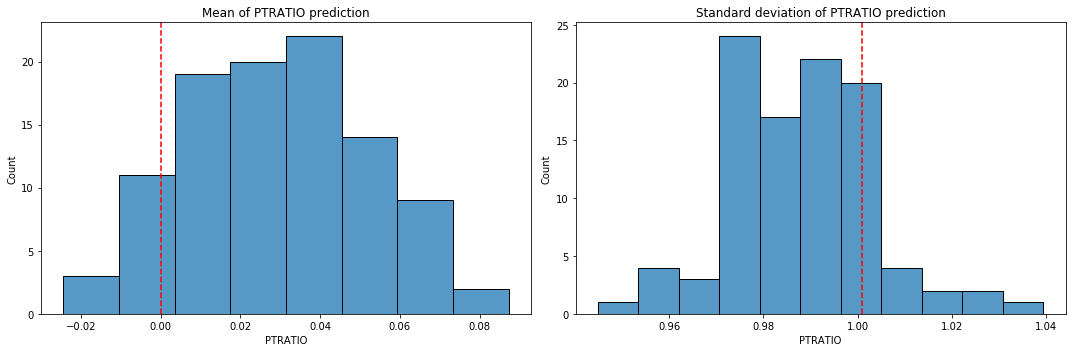

In [7]:
plt.figure(figsize = (15,5))
n = 'PTRATIO'

plt.subplot(1,2,1)
sns.histplot(em_mean.loc[n])
plt.axvline(data_tr.mean()[n], linestyle = '--', color = 'r')
plt.title("Mean of %s prediction" %n)
plt.subplot(1,2,2)
sns.histplot(em_std.loc[n])
plt.axvline(data_tr.std()[n], linestyle = '--', color = 'r')
plt.title("Standard deviation of %s prediction" %n)
plt.tight_layout()
plt.show()

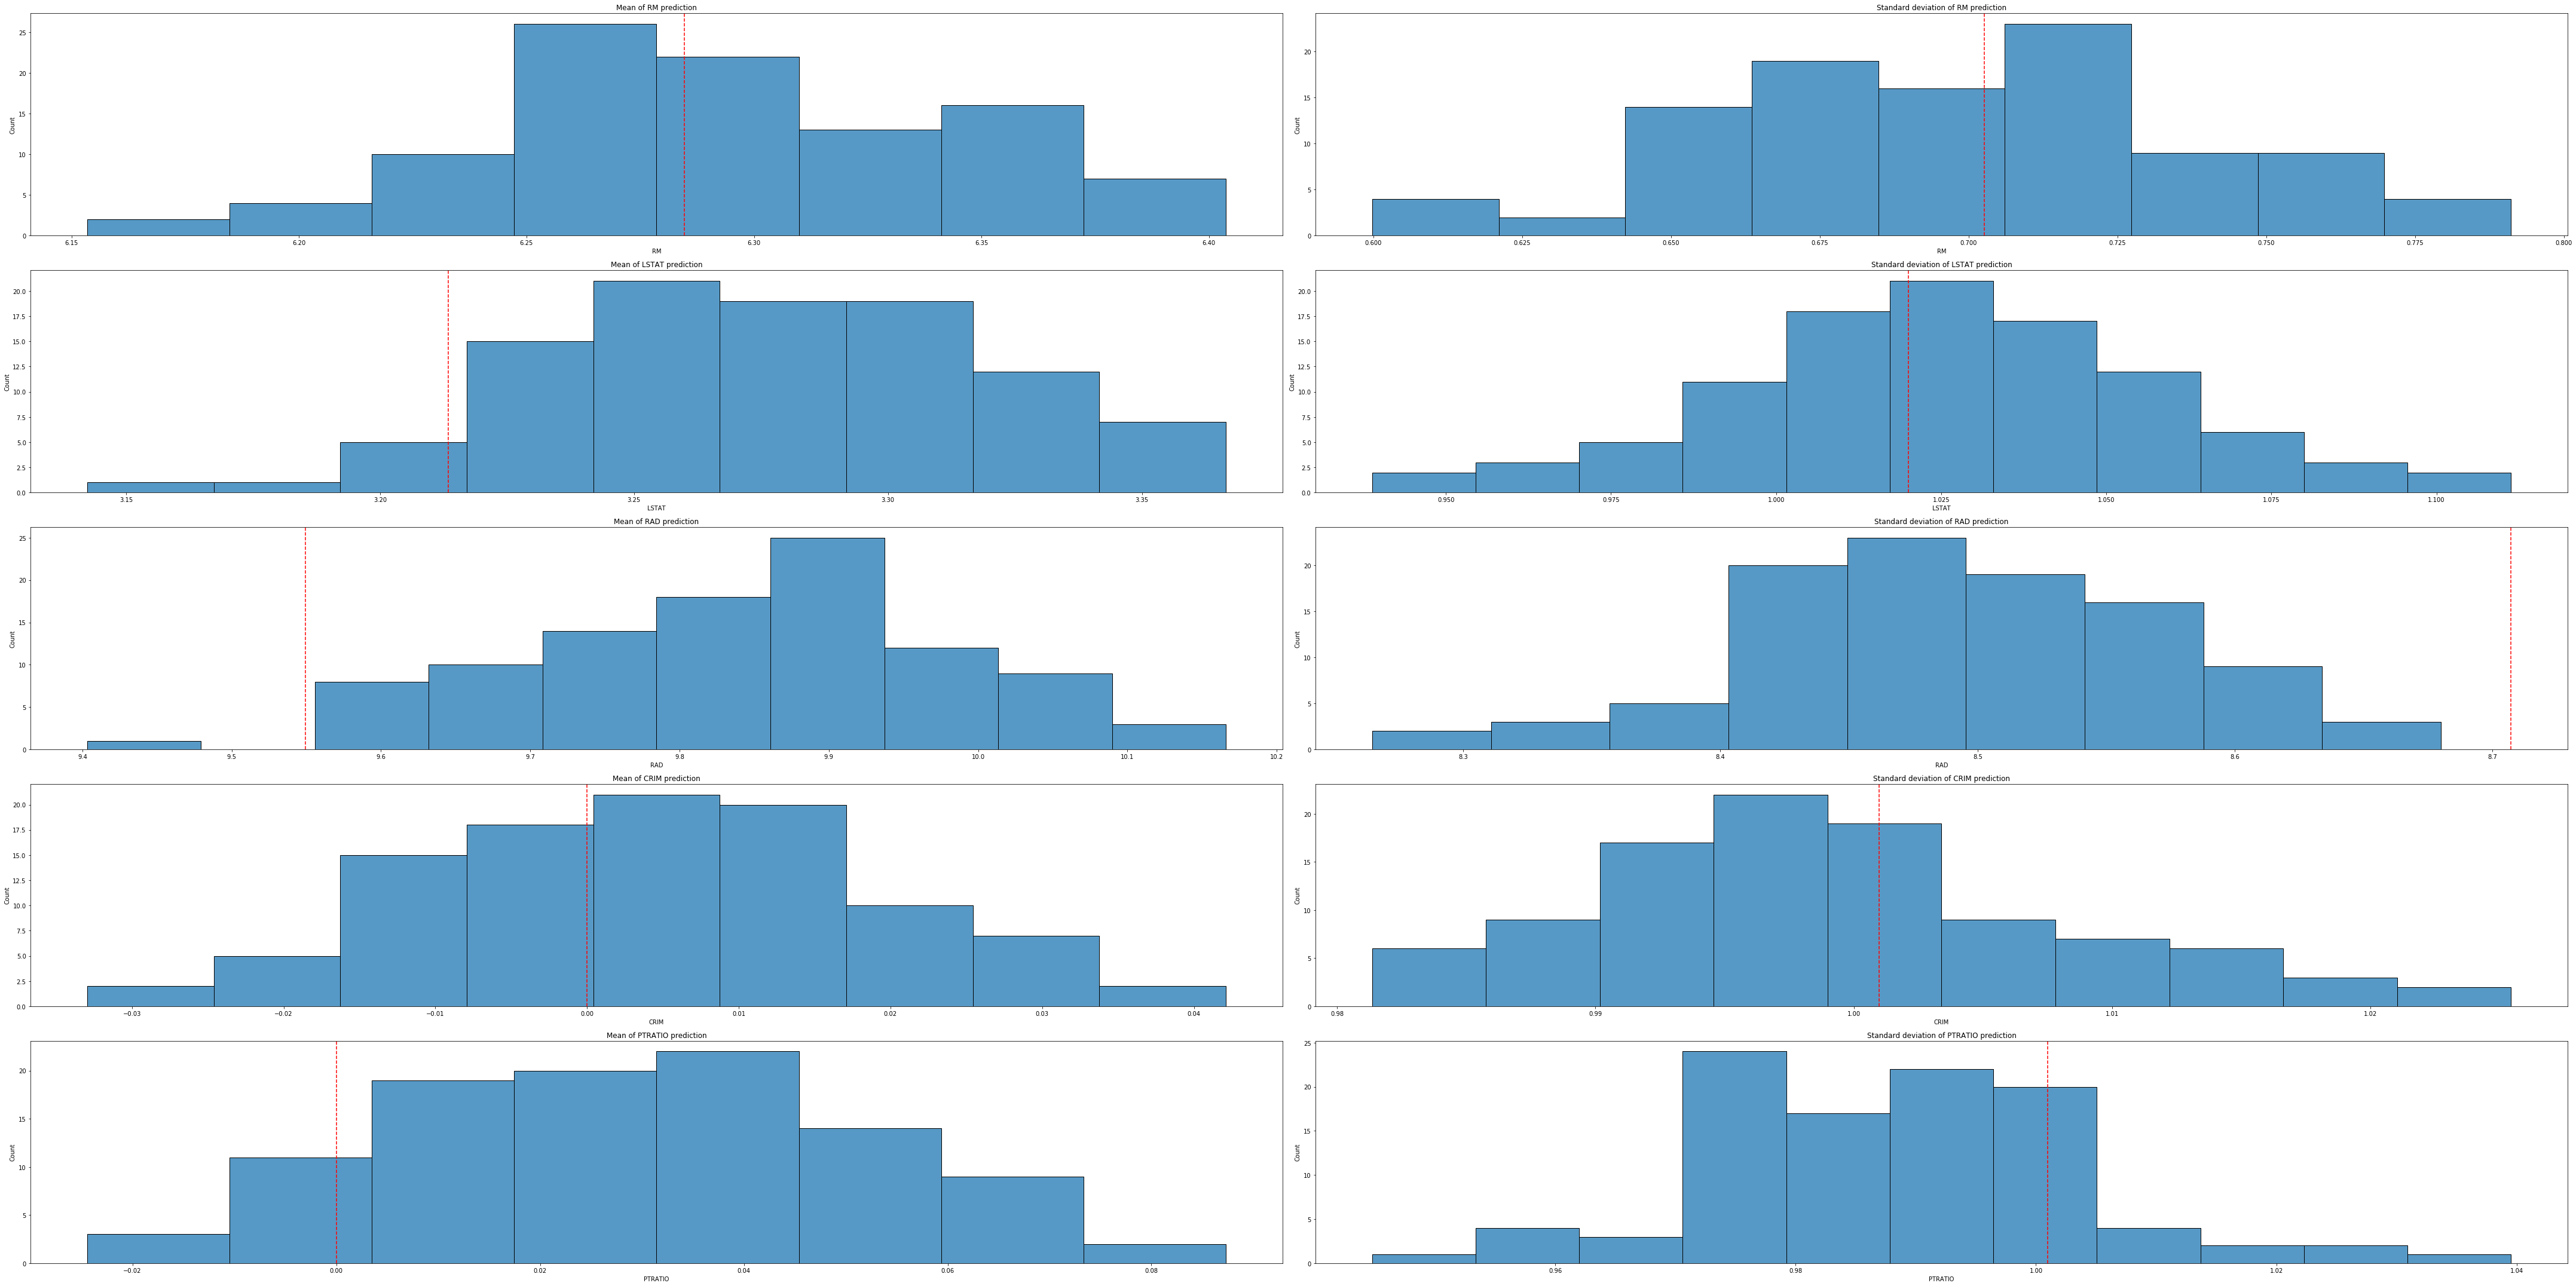

In [8]:
plt.figure(figsize = (60,30))

for i, n in enumerate(['RM', 'LSTAT', 'RAD', 'CRIM', 'PTRATIO']):
    plt.subplot(5,2,1 + 2*i)
    sns.histplot(em_mean.loc[n])
    plt.axvline(data_tr.mean()[n], linestyle = '--', color = 'r')
    plt.title("Mean of %s prediction" %n)
    plt.subplot(5,2,2 + 2*i)
    sns.histplot(em_std.loc[n])
    plt.axvline(data_tr.std()[n], linestyle = '--', color = 'r')
    plt.title("Standard deviation of %s prediction" %n)
plt.tight_layout()
plt.show()

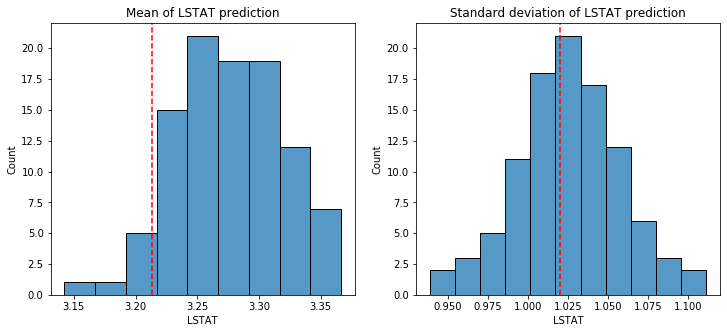

In [9]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(em_mean.loc['LSTAT'])
plt.axvline(data_tr.mean()['LSTAT'], linestyle = '--', color = 'r')
plt.title("Mean of LSTAT prediction")
plt.subplot(1,2,2)
sns.histplot(em_std.loc['LSTAT'])
plt.axvline(data_tr.std()['LSTAT'], linestyle = '--', color = 'r')
plt.title("Standard deviation of LSTAT prediction")
plt.show()

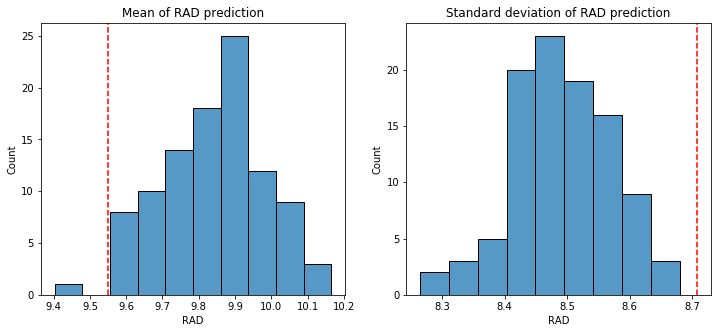

In [10]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(em_mean.loc['RAD'])
plt.axvline(data_tr.mean()['RAD'], linestyle = '--', color = 'r')
plt.title("Mean of RAD prediction")
plt.subplot(1,2,2)
sns.histplot(em_std.loc['RAD'])
plt.axvline(data_tr.std()['RAD'], linestyle = '--', color = 'r')
plt.title("Standard deviation of RAD prediction")
plt.show()

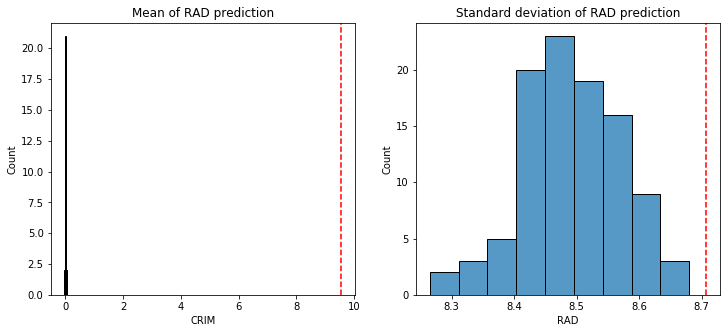

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(em_mean.loc['CRIM'])
plt.axvline(data_tr.mean()['RAD'], linestyle = '--', color = 'r')
plt.title("Mean of RAD prediction")
plt.subplot(1,2,2)
sns.histplot(em_std.loc['RAD'])
plt.axvline(data_tr.std()['RAD'], linestyle = '--', color = 'r')
plt.title("Standard deviation of RAD prediction")
plt.show()

In [12]:
ce_imp = pd.read_csv('./data/imp/ce/ce_imp1.csv', index_col=0)
ce_imp.head()

,X1.RM,X1.LSTAT,X1.RAD,X1.CRIM,X1.PTRATIO,X1.DIS,X1.ZN,X1.NOX,X1.CHAS,X1.B,X1.TAX,X1.INDUS,X1.AGE,X1.MEDV
14,5.627,4.138882,3,0.290653,0.073472,4.4619,0.0,0.538,0,380.02,307,8.14,84.5,18.2
32,5.631,4.159843,6,0.521878,0.833917,3.9900,0.0,0.538,0,232.60,307,8.14,82.0,13.2
38,6.144,2.867908,5,-0.348824,-0.481156,3.8473,0.0,0.499,0,393.43,279,5.96,30.2,24.7
43,6.871,1.612908,5,-1.787680,-0.435596,5.7209,0.0,0.448,0,394.46,233,6.91,6.5,24.7
44,6.335,3.454999,3,-1.242153,0.187986,5.7209,0.0,0.448,0,389.39,233,6.91,40.0,21.2


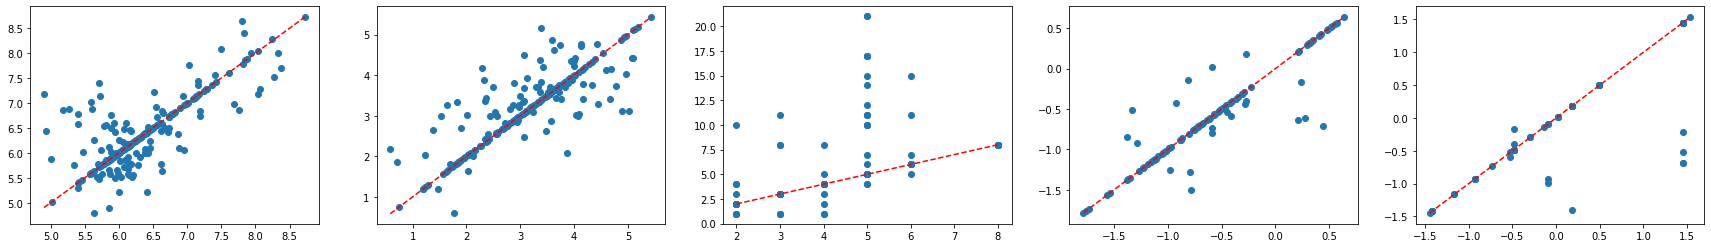

In [13]:
result(data_missing, data_tr, em_imp, prefix = '')

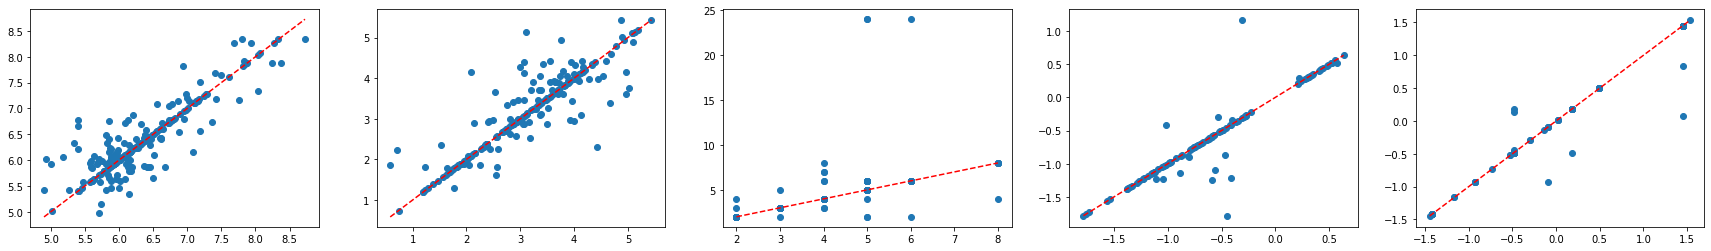

In [14]:
result(data_missing, data_tr, ce_imp, prefix = 'X1.')